###  Сборный проект "Выявление закономерностей, определяющих успешность игр"
### Оглавление:
* [Цель проекта](#intent)
* 1 [Изучение, описание и обработка данных в таблице](#opening_processing_data)
    * 1.1 [Описание датасета](#description)
    * 1.2 [Изменение регистра названий колонок и типа данных колонки с оценками пользователей](#columns_datatype)
    * 1.3 [Пропуски в колонке с названием игр](#name_nan)
    * 1.4 [Пропуски в колонке с годом выпуска игры](#year_nan)
    * 1.5 [Пропуски в колонках с оценками пользователей и критиков](#scores_nan)
    * 1.6 [Пропуски в колонке с рейтингом игр](#rating_nan)
    * 1.7 [Расчет суммарных продаж по всем регионам](#count_all_sales)
* 2 [Исследовательский анализ данных](#data_analysis)
    * 2.1 [Количество выпускаемых игр в разные годы](#games_by_years)
    * 2.2 [Продажи игр в зависимости от платформы](#sales_by_platforms)
    * 2.3 [Потенциально прибыльные платформы за актуальный период](#platforms_by_current_period)
    * 2.4 [Диграммы размаха по глобальным продажам для PS4 и Xbox One](#boxplot_ps4_xone)
    * 2.5 [Влияние на продажи игр для PS4 отзывов пользователей и критиков](#cor_scores_sales_ps4)
    * 2.6 [Распределение продаж игр по жанрам](#sales_by_genres)
* 3 [Портрет пользователя каждого региона](#user_type_by_regions)
    * 3.1 [Топ-5 популярных платформ для каждого региона](#top5_platforms_by_regions)
    * 3.2 [Топ-5 популярных жанров игр для каждого региона](#top5_genres_by_regions)
    * 3.3 [Влияние рейтинга ESRB на продажи игр в отдельном регионе](#sales_by_rating)
* 4 [Проверка гипотез](#hypotheses)
    * 4.1 [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#mean_scores_xone_pc)
    * 4.2 [Средние пользовательские рейтинги жанров "Action" и "Sports" разные](#mean_scores_action_sports)
* 5 [Общий вывод](#conclusion)

### Цель проекта:<a name="intent"></a>
На основе имеющихся исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах необходимо выявить закономерности, которые позволят спрогнозировать какие игры будут востребованы в ближайшем будущем. Для этого нужно:
> - Обработать исторические данные о продажах игр;
> - Расчитать суммарные продажи игр во всех регионах;
> - Определить актуальный период времени, на основе анализа которого будет делаться прогноз;
> - Определить потенциально прибыльные платформы;
> - Проанализировать влияние на продажи игр отзывов пользователей и критиков;
> - Рассмотреть распределение игр по жанрам;
> - Определить топ-5 платформ по продажам игр для каждого региона;
> - Определить топ-5 жанров по продажам игр для каждого региона;
> - Определить по каждому рейтингу долю в продажах игр для каждого региона;
> - Проверить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
> - Проверить гипотезу о том, что средние пользовательские рейтинги жанров "Action" и "Sports" разные.

### 1 Изучение, описание и обработка данных в таблице<a name="opening_processing_data"></a>
#### 1.1 Описание датасета<a name="description"></a>
Импортируем нужные библиотеки и откроем файл с данными о продажах игр.

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
games = pd.read_csv('d:/files/praktikum_csv_files/games.csv')
games.info()
games.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9277,Apex,XB,2003.0,Racing,0.10,0.03,0.00,0.00,74.0,9.1,E
14056,Richard Burns Rally,PC,2004.0,Racing,0.00,0.03,0.00,0.01,NaN,NaN,NaN
16504,Teenage Mutant Ninja Turtles (3DS),3DS,2013.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN
10958,Tak: The Great Juju Challenge,DS,2005.0,Platform,0.09,0.00,0.00,0.01,66.0,tbd,E
14145,Zenkoku Dekotora Matsuri,Wii,2008.0,Racing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
3047,Thrillville,PS2,2006.0,Strategy,0.55,0.02,0.00,0.09,69.0,2.9,E10+
5282,Bloody Roar 3,PS2,2001.0,Fighting,0.15,0.11,0.05,0.04,71.0,8.6,T
974,NBA 2K11,PS3,2010.0,Action,1.41,0.20,0.03,0.16,89.0,7.6,E
14635,Bladestorm: Nightmare,PS3,2015.0,Action,0.00,0.00,0.03,0.00,NaN,7.4,T
8305,Captain America: Super Soldier,X360,2011.0,Action,0.11,0.05,0.00,0.01,60.0,6.4,T


Пропуски данных в 6-ти колонках:
> - Название игры;
> - Год выпуска;
> - Жанр;
> - Оценка критиков;
> - Оценка пользователей;
> - Рейтинг.

Также в колонке с оценками пользователей некорректный тип данных "object", который необоходимо изменить на "float".

#### 1.2 Изменение регистра названий колонок и типа данных колонки с оценками пользователей<a name="columns_datatype"></a>

Сначала приведем названия колонок к нижнему регистру для удобства их написания в коде в дальнейшем. Для этого заменим названия колонок.

In [177]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Тип данных колонки с оценками пользователей изменим на "float" методом "to_numeric".

In [178]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### 1.3 Пропуски в колонке с названием игр<a name="name_nan"></a>
Выведем игры, у которых не указаны названия.

In [179]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких игр две. Так как мы не можем их идентифицировать, то удалим их, на остальные данные это не повлияет.

In [180]:
games = games[~games['name'].isna()]
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


#### 1.4 Пропуски в колонке с годом выпуска игры<a name="year_nan"></a>
Меньше, чем для 2 % игр не указан год выпуска. Эти строки также удаляем, так как это не повлияет на качество данных.

In [181]:
games.dropna(axis=0, subset=['year_of_release'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


#### 1.5 Пропуски в колонках с оценками пользователей и критиков<a name="scores_nan"></a>
Для примерно половины игр датасета нет информации об оценках пользователей и критиков. Возможно эти игры выпускались до появления систем оценок либо эти игры не пользовались популярностью и поэтому не попадали в эти списки. Удаление такого количества данных приведет к искажению результатов, поэтому оставим всё как есть.

#### 1.6 Пропуски в колонке с рейтингом игр<a name="rating_nan"></a>
Выведем уникальные значения в этой колонке.

In [182]:
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Кроме одного одного, все эти маркировки присутствуют в системе рейтинга ESRB. Рейтинг "K-A" - первоначальное название действующего сейчас рейтинга "E", поэтому изменим его на актуальное.

In [183]:
games = games.replace('K-A', 'E')
games['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

Пропусков в этой колонке больше 40 %. Также оставим эти пропуски, так как нет данных для их заполнения, а удаление исказит результаты анализа. Проверим таблицу на дубликаты.

In [184]:
games.duplicated().sum()

0

Дубликатов в таблице нет.

#### 1.7 Расчет суммарных продаж по всем регионам<a name="count_all_sales"></a>
Добавим в новую колонку суммарные продажи для каждой игры по всем регионам.

In [185]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Большую часть пропусков данных в датасете невозможно обработать так, чтобы это не повлияло на результат исследования, поэтому игры с пропущенными значениями оставлены в таблице. Скорее всего, отсутствие информации о рейтинге и оценках пользователей и критиков является характерным для этих игр.

### 2 Исследовательский анализ данных<a name="data_analysis"></a>
#### 2.1 Количество выпускаемых игр в разные годы<a name="games_by_years"></a>
Оценим по годам количество выпускаемых игр, для этого построим соответствующий график.

Text(0, 0.5, 'Кол-во игр')

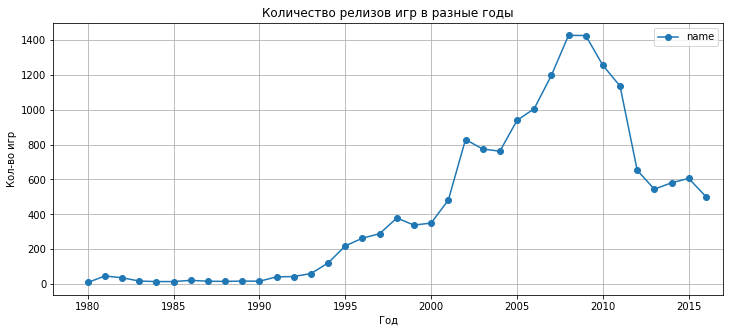

In [186]:
games_by_year_plot = (games
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(style='o-', xlim=(1978, 2017), title='Количество релизов игр в разные годы', grid=True, figsize=(12, 5)))
games_by_year_plot.set_xlabel('Год')
games_by_year_plot.set_ylabel('Кол-во игр')

С 1980 и примерно до 1993 года в год выпускалось несколько десятков игр. Затем началось бурное развите рынка и к 2008 году в год выпускалось уже больше тысячи игр. Затем началось уменьшение количества релизов в год, вероятно технологии и пользователи стали более требовательны к играм, что увеличило сроки их разработок. К 2015 году количество релизов в год сократилось примерно до 500.

Будет некорректным делать прогноз об успешности игр, основываясь на анализе игр, которые уже не востребованы массово. Необходимо определить актуальный период.

#### 2.2 Продажи игр в зависимости от платформы<a name="sales_by_platforms"></a>
Выведем платформы с наибольшими суммарными продажами.

In [187]:
(games
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values('all_sales', ascending=False)
    .reset_index()
    .head(15))

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


На примере 3-х производителей (Sony, Microsoft и Nintendo), чьи платформы занимают первые 4 строчки по суммарным продажам игр, рассмотрим как распределялись продажи игр для этих платформ по годам. Также сравним с предыдущими или следующими поколениями каждой из платформ. Для этого построим гистограммы распределения продаж. Начнем с Sony и 4-х поколений Playstation.

Text(0, 0.5, 'Суммарные продажи, млн')

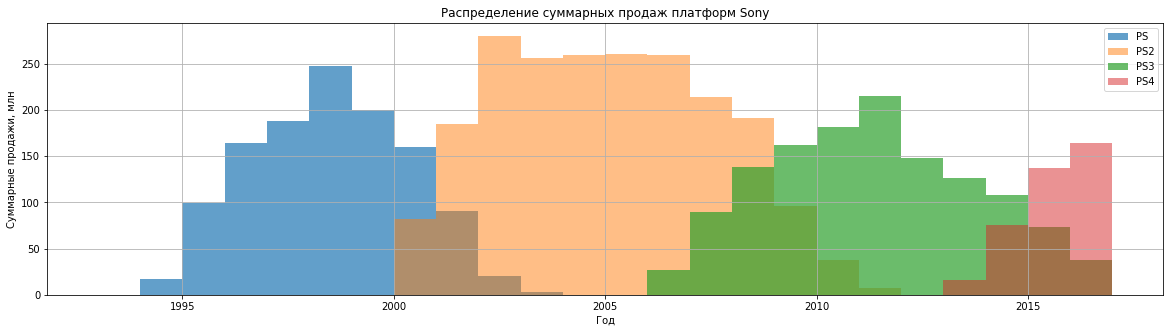

In [188]:
ax = (games
      .query('platform == "PS"')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=12, label='PS', figsize = (20, 5), range=(1993, 2005),
            grid=True, legend=True, alpha=0.7, title='Распределение суммарных продаж платформ Sony'))
(games
      .query('platform == "PS2"')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=14, label='PS2', figsize = (20, 5), range=(1999, 2013),
            grid=True, legend=True, alpha=0.5, ax=ax))
(games
      .query('platform == "PS3"')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=12, label='PS3', figsize = (20, 5), range=(2005, 2017),
            grid=True, legend=True, alpha=0.7, ax=ax))
(games
      .query('platform == "PS4"')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=6, label='PS4', figsize = (20, 5), range=(2011, 2017),
            grid=True, legend=True, alpha=0.5, ax=ax))
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи, млн')

Если судить по продажам игр, то первые поколения PS и PS2 имели срок жизни около 10 лет. Похожее распределение и у PS3, а значит после 2016 года ее продажи скорее всего окончательно упадут. Продажи игр для PS4 стартовали примерно в 2013 году и продолжают расти в 2016.

Теперь построим гистограммы для 3-х платформ Microsoft.

Text(0, 0.5, 'Суммарные продажи, млн')

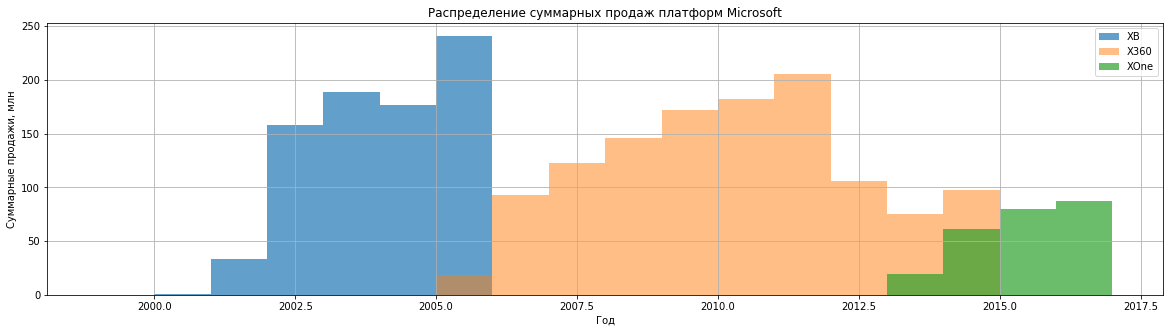

In [189]:
ax = (games
      .query('platform == "XB"')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=7, label='XB', figsize = (20, 5), range=(1999, 2006),
            grid=True, legend=True, alpha=0.7, title='Распределение суммарных продаж платформ Microsoft'))
(games
      .query('platform == "X360"')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=11, label='X360', figsize = (20, 5), range=(2004, 2015),
            grid=True, legend=True, alpha=0.5, ax=ax))
(games
      .query('platform == "XOne"')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=5, label='XOne', figsize = (20, 5), range=(2012, 2017),
            grid=True, legend=True, alpha=0.7, ax=ax))
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи, млн')

Для первого поколения Xbox игры покупали на протяжении почти 6 лет. Настораживает данный график тем, что продажи закончились резко и на пике. Судя по гистограмме пользователи разом перешли на новое поколение Xbox 360. Игры для этого поколения продавались уже на протяжении 10 лет и менее резко, чем у первого поколения, но тоже упали и закончились с выходом Xbox One в 2013 году. К 2016 году продажи игр для этого поколения по-прежнему растут.

Далее Nintendo.

Text(0, 0.5, 'Суммарные продажи, млн')

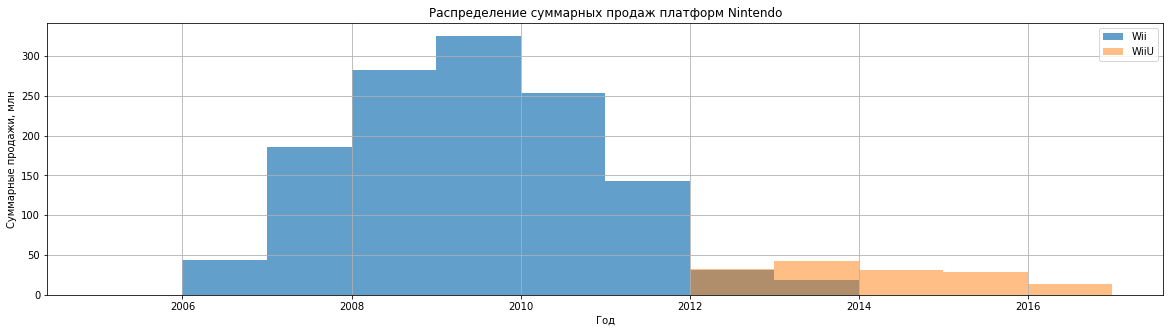

In [190]:
ax = (games
      .query('platform == "Wii"')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=9, label='Wii', figsize = (20, 5), range=(2005, 2014),
            grid=True, legend=True, alpha=0.7, title='Распределение суммарных продаж платформ Nintendo'))
(games
      .query('platform == "WiiU"')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=6, label='WiiU', figsize = (20, 5), range=(2011, 2017),
            grid=True, legend=True, alpha=0.5, ax=ax))
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи, млн')

Игры для платформы Wii начали продаваться в 2006 году, достигли пика продаж в 2009 и перестали продавать в 20014. В 2012 году вышло следующее поколение WiiU. Можно сделать вывод, что новая платформа провалилась, к 2016 году годовые продажи игр для нее ни разу не превысили 20 % от пика продаж предыдущего поколения и сейчас падают.
Если ориентироваться на последние платформы самых популярных производителей, продажи игр для которых к 2016 году продолжают расти, то срок жизни платформ составляет около 10 лет, а актуальным для выявления предпочтений пользователей будет период с 2013 по 2016 год.

#### 2.3 Потенциально прибыльные платформы за актуальный период<a name="platforms_by_current_period"></a>
Сохраним данные за актуальный период в переменной "current_period" о определим платформы с наибольшими суммарными продажами игр.

In [191]:
current_period = games[games['year_of_release'] >= 2013].reset_index(drop=True)
(current_period
               .pivot_table(index='platform', values='all_sales', aggfunc='sum')
               .sort_values('all_sales', ascending=False)
)

,all_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Рассмотрим платформы, для которых за актуальный период было продано больше 100 миллионов копий игр. Таких платформ 5, построим для них гистограммы распределения продаж игр по годам.

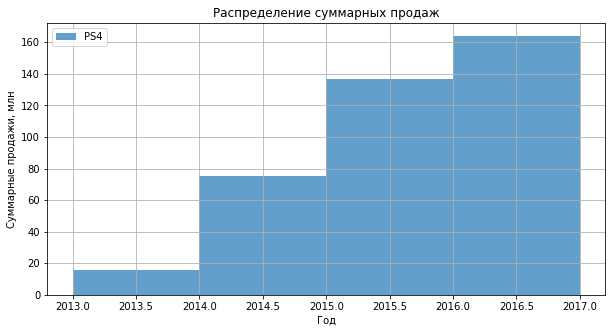

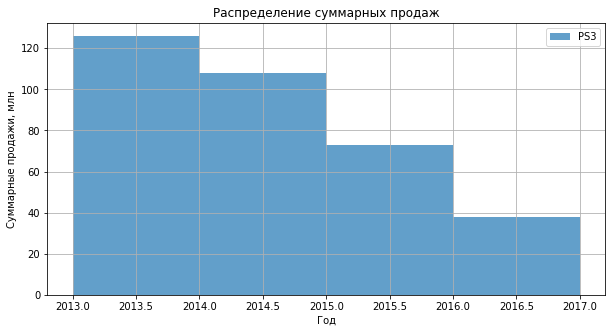

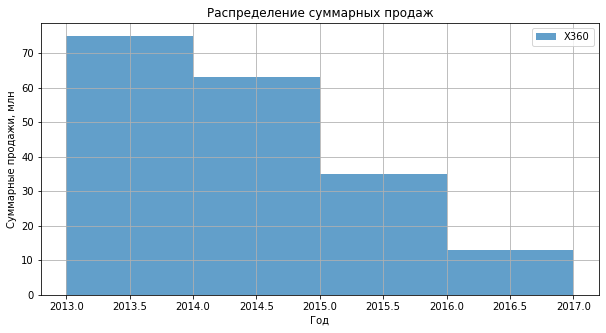

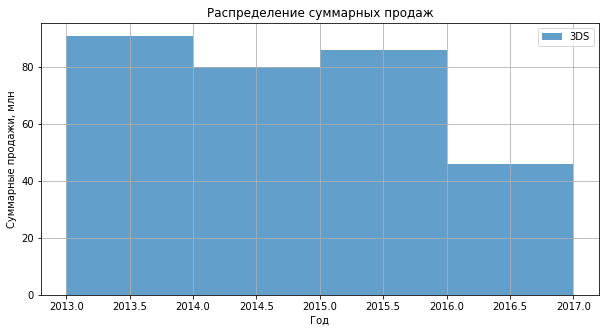

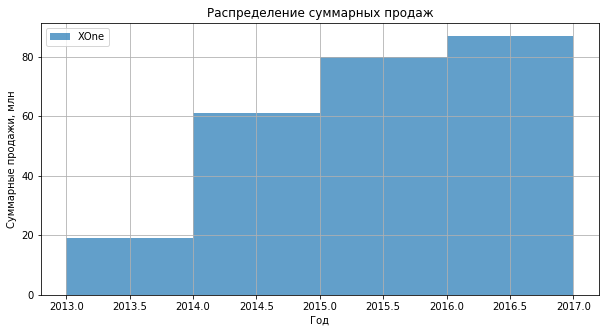

In [192]:
platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
for platform in platforms:
    (current_period
      .query('platform == @platform')
      .plot(x='all_sales', y='year_of_release', kind='hist', bins=4, label=platform, figsize = (10, 5), range=(2013, 2017),
            grid=True, legend=True, alpha=0.7, title='Распределение суммарных продаж'))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи, млн')
    plt.show()

Потенциально прибыльными платформами являются PS4 и Xbox One. Так как только у них из пяти лидеров по суммарным продажам игр продажи продолжают расти.

#### 2.4 Диграммы размаха по общемировым продажам для PS4 и Xbox One<a name="boxplot_ps4_xone"></a>
Выведем диаграмму PS4.

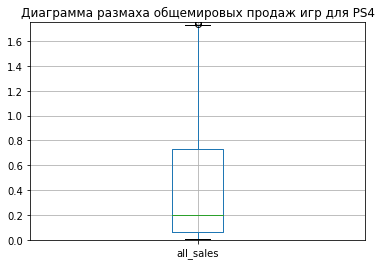

In [193]:
plt.ylim(0, 1.75)
current_period.query('platform == "PS4"').boxplot('all_sales')
plt.title('Диаграмма размаха общемировых продаж игр для PS4')
plt.show()

Большинство значений по глобальным продажам игр для PS4 лежат в примерном диапазоне от 100 до 700 тысяч проданных копий. Медиана - 200 тысяч, граница, после которой начинаются выбросы, лежит на значении примерно 1.7 миллионов копий.

Далее диаграмма для Xbox One.

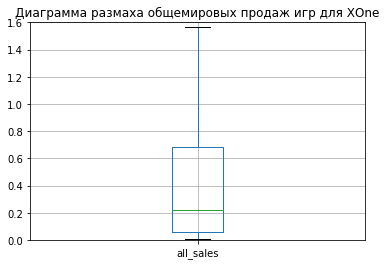

In [194]:
plt.ylim(0, 1.6)
current_period.query('platform == "XOne"').boxplot('all_sales')
plt.title('Диаграмма размаха общемировых продаж игр для XOne')
plt.show()

Большинство значений по глобальным продажам игр для Xbox One лежат в примерном диапазоне от 60 до 700 тысяч проданных копий. Медиана - чуть больше 200 тысяч, граница, после которой начинаются выбросы, лежит на значении примерно 1.55 миллионов копий.

#### 2.5 Влияние на продажи игр для PS4 отзывов пользователей и критиков<a name="cor_scores_sales_ps4"></a>
Для оценки этого влияния построим диаграмму рассеяния и матрицу корреляции между отзывами и продажами.

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
all_sales,0.406568,-0.031957,1.000000


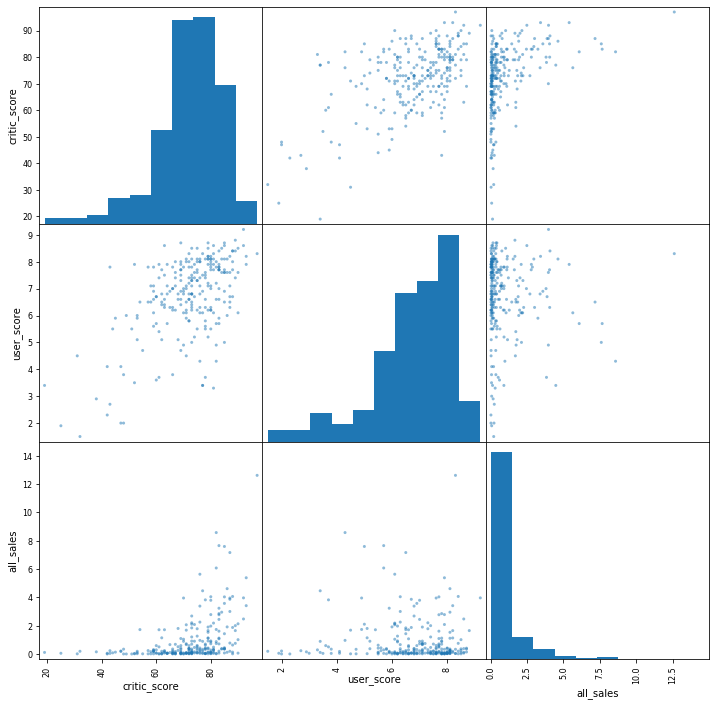

In [195]:
cor_scores_sales_ps4 = (current_period
                        .query('platform == "PS4" and critic_score != 0 and user_score != 0')
                        [['critic_score', 'user_score', 'all_sales']])
pd.plotting.scatter_matrix(cor_scores_sales_ps4, figsize=(12, 12))
cor_scores_sales_ps4.corr()

По имеющимся данным оценить связь между отзывами критиков и продажами игр для PS4 можно как небольшую - коэффициент корреляции Пирсона составляет 0.4. То есть положительные отзывы незначительно увеличивают продажи. Отзывы пользователей по этим данным на продажи игр не влияют - коэфициент корреляции Пирсона составляет -0.03. А значит при оценке потенциальной успешности игры для этой и для других платформ стоит учитывать только отзывы критиков, но не как решающий фактор.

#### 2.6 Распределение продаж игр по жанрам<a name="sales_by_genres"></a>
Построим сводную таблицу для определения суммарных продаж игр каждого жанра.

In [196]:
(current_period
                .pivot_table(index='genre', values='all_sales', aggfunc='sum')
                .sort_values('all_sales', ascending=False)
                .reset_index()
)

,genre,all_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Самыми продаваемыми за актуальный период являются игры жанра "Action". Также выделяются жанры "Shooter", "Sports", и "Role_Playing". Более 100 миллионов копий игр каждого из этих жанров было продано за актуальный период. Наименее продаваемым является жанр "Puzzle".



### 3 Портрет пользователя каждого региона<a name="user_type_by_regions"></a>
#### 3.1 Топ-5 популярных платформ для каждого региона<a name="top5_platforms_by_regions"></a>
С помощью сводной таблицы посчитаем продажи игр по пяти самым успешным платформам для каждого региона, а также их долю от рынка продаж в регионе.

In [197]:
na_sales_by_platform = (current_period
               .pivot_table(index='platform', values='na_sales', aggfunc='sum')
               .sort_values('na_sales', ascending=False)
               .reset_index()
)
na_sales_by_platform['part'] = na_sales_by_platform['na_sales'] / na_sales_by_platform['na_sales'].sum()
display(na_sales_by_platform.head())

eu_sales_by_platform = (current_period
               .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
               .sort_values('eu_sales', ascending=False)
               .reset_index()
)
eu_sales_by_platform['part'] = eu_sales_by_platform['eu_sales'] / eu_sales_by_platform['eu_sales'].sum()
display(eu_sales_by_platform.head())

jp_sales_by_platform = (current_period
               .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
               .sort_values('jp_sales', ascending=False)
               .reset_index()
)
jp_sales_by_platform['part'] = jp_sales_by_platform['jp_sales'] / jp_sales_by_platform['jp_sales'].sum()
display(jp_sales_by_platform.head())

,platform,na_sales,part
0,PS4,108.74,0.248429
1,XOne,93.12,0.212744
2,X360,81.66,0.186562
3,PS3,63.50,0.145073
4,3DS,38.20,0.087272


,platform,eu_sales,part
0,PS4,141.09,0.359712
1,PS3,67.81,0.172883
2,XOne,51.59,0.131530
3,X360,42.52,0.108406
4,3DS,30.96,0.078933


,platform,jp_sales,part
0,3DS,67.81,0.481674
1,PS3,23.35,0.165862
2,PSV,18.59,0.132050
3,PS4,15.96,0.113368
4,WiiU,10.88,0.077284


В Северной Америке и Европе наибольшую долю в продажах за актуальный период имеют игры для PS4: 25 и 36 % рынка соответственно. В Японии игры для PS4 только четвертые с долей в 11 %.

Игры для Xbox One вторые по продажам в Северной Америке и третьи в Европе с долями 21 и 13 % соответственно, а Японии игры для платформ Microsoft в топ-5 не входят.

Почти половину рынка продаж игр в Японии занимают игры для 3DS. В Северной Америке и Европе игры для этой платформы по продажам на пятом месте с долями 9 и 8 % соответственно.

#### 3.2 Топ-5 популярных жанров игр для каждого региона<a name="top5_genres_by_regions"></a>
Также сведем таблицы по жанрам игр и их продажам для каждого региона и посчитаем их долю.

In [198]:
na_sales_by_genre = (current_period
               .pivot_table(index='genre', values='na_sales', aggfunc='sum')
               .sort_values('na_sales', ascending=False)
               .reset_index()
)
na_sales_by_genre['part'] = na_sales_by_genre['na_sales'] / na_sales_by_genre['na_sales'].sum()
display(na_sales_by_genre.head())

eu_sales_by_genre = (current_period
               .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
               .sort_values('eu_sales', ascending=False)
               .reset_index()
)
eu_sales_by_genre['part'] = eu_sales_by_genre['eu_sales'] / eu_sales_by_genre['eu_sales'].sum()
display(eu_sales_by_genre.head())

jp_sales_by_genre = (current_period
               .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
               .sort_values('jp_sales', ascending=False)
               .reset_index()
)
jp_sales_by_genre['part'] = jp_sales_by_genre['jp_sales'] / jp_sales_by_genre['jp_sales'].sum()
display(jp_sales_by_genre.head())

,genre,na_sales,part
0,Action,126.05,0.287976
1,Shooter,109.74,0.250714
2,Sports,65.27,0.149117
3,Role-Playing,46.40,0.106006
4,Misc,27.49,0.062804


,genre,eu_sales,part
0,Action,118.13,0.301175
1,Shooter,87.86,0.224001
2,Sports,60.52,0.154297
3,Role-Playing,36.97,0.094256
4,Racing,20.19,0.051475


,genre,jp_sales,part
0,Role-Playing,51.04,0.362551
1,Action,40.49,0.287612
2,Misc,9.20,0.065350
3,Fighting,7.65,0.054340
4,Shooter,6.61,0.046953


Первые 4 строчки самых продаваемых жанров игр одинаковы для Северной Америки и Европы, их доли в продажах также похожи. Самый популярный жанр Северной Америки и Европы "Action" в Японии на втором месте, но со сравнимой долей в 29 %. Самым популярным жанром в Японии являяется "Role-Playing" с долей в продажах 36 %. В Северной Америке и Европе этот жанр на четвертом месте с долями 10 и 9 % соответственно. Очень похоже, что в Японии особое отношение к этому жанру. Также вероятно в игры этого жанра удобнее всего играть на портативной платформе 3DS, самой популярной в Японии.

#### 3.3 Влияние рейтинга ESRB на продажи игр в отдельном регионе<a name="sales_by_rating"></a>
Через сводные таблицы с рейтингом и продажами оценим это влияние.

In [199]:
na_sales_by_rating = (current_period
               .query('rating != 0')
               .pivot_table(index='rating', values='na_sales', aggfunc='sum')
               .sort_values('na_sales', ascending=False)
               .reset_index()
)
na_sales_by_rating['part'] = na_sales_by_rating['na_sales'] / na_sales_by_rating['na_sales'].sum()
display(na_sales_by_rating)

eu_sales_by_rating = (current_period
               .query('rating != 0')
               .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
               .sort_values('eu_sales', ascending=False)
               .reset_index()
)
eu_sales_by_rating['part'] = eu_sales_by_rating['eu_sales'] / eu_sales_by_rating['eu_sales'].sum()
display(eu_sales_by_rating)

jp_sales_by_rating = (current_period
               .query('rating != 0')
               .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
               .sort_values('jp_sales', ascending=False)
               .reset_index()
)
jp_sales_by_rating['part'] = jp_sales_by_rating['jp_sales'] / jp_sales_by_rating['jp_sales'].sum()
display(jp_sales_by_rating)

,rating,na_sales,part
0,M,165.21,0.474346
1,E,79.05,0.226966
2,E10+,54.24,0.155732
3,T,49.79,0.142956


,rating,eu_sales,part
0,M,145.32,0.463807
1,E,83.36,0.266054
2,E10+,42.69,0.136250
3,T,41.95,0.133889


,rating,jp_sales,part
0,T,20.59,0.369460
1,E,15.14,0.271667
2,M,14.11,0.253185
3,E10+,5.89,0.105688


Расположение игр по продажам в зависимости от рейтинга одинаково для Северной Америки и Европы, их доли очень близки друг к другу. Самым популярным рейтингом, занимающим почти половину рынка продаж игр, является "M" ("Для взрослых"). Япония снова отличается, там игры с таким рейтингом имеют долю в продажах 24 % и третье место. А самый продаваемый рейтинг в Японии - "T" ("Подросткам"), доля таких игр 38 %.

### 4 Проверка гипотез<a name="hypotheses"></a>
#### 4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<a name="mean_scores_xone_pc"></a>
Чтобы проверить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, примем ее за нулевую гипотезу. Гипотеза о том, что средние пользовательские рейтинги различаются будет альтернативной. Критический уровень значимости "alpha" примем равным 0.05. После этого проведем статистический тест для двух выборок и по его резельтатам рассчитаем суммарную вероятность получить случайное значение в опыте настолько далеким от среднего значения ("p-value"). Если "p-value" будет меньше "alpha", при условии, что нулевая гипотеза верна, то нулевая гипотеза будет отвергнута.

Сначала сохраним пользовательские рейтинги платформ Xbox и PC в разные таблицы соответственно. Затем проведем статистический тест методом st.ttest_ind(), которому в качестве аргументов передадим массивы данных и параметр "equal_var". Для того, чтобы определить какое значение придавать параметру "equal_var" рассчитаем дисперсии выборок, если они будут близки друг к другу, то "equal_var=True", если будут отличаться больше, чем на 5 %, то "equal_var=False". По результатам теста рассчитаем "p-value" соответствующим методом.

In [200]:
xone_games = current_period[~current_period['user_score'].isna()].query('platform == "XOne"')
pc_games = current_period[~current_period['user_score'].isna()].query('platform == "PC"')
display(np.var(xone_games['user_score'], ddof=1))
display(np.var(pc_games['user_score'], ddof=1))

1.9069968429360695

3.035892752408882

Дисперсия пользовательских оценок игр Xbox One почти на 30 % меньше дисперсии пользовательских оценок игр для персональных компьютеров. Передаем методу аргумент "equal_var=False".

In [201]:
results_xone_pc = st.ttest_ind(xone_games['user_score'], pc_games['user_score'], equal_var = False)
(display(current_period[~current_period['user_score'].isna()]
         .query('platform == "XOne" or platform == "PC"')
         .pivot_table(index='platform', values='user_score')))
display(results_xone_pc.pvalue)

,user_score
platform,
PC,6.269677
XOne,6.521429


0.14759594013430463

Полученное "p-value" больше "alpha". Это означает, что у нас нет оснований отвергнуть нулевую гипотезу, то есть средний пользовательский рейтинг генеральной совокупности пользовательских оценок игр Xbox One не отличается от среднего пользовательского рейтинга генеральной совокупности пользовательских оценок игр PC. Это означает, что на примере данных выборок такую разницу в средней выручке можно получить с вероятностью 15 %. Эта вероятность больше критического уровня значимости, что не позволяет делать вывод о значимом различии средних пользовательских оценок игр для этих платформ.

#### 4.2 Средние пользовательские рейтинги жанров "Action" и "Sports" разные<a name="mean_scores_action_sports"></a>
В данном случае за нулевую гипотезу примем то, что средний пользовательский рейтинг игр жанра "Action" не отличается от среднего пользовательского рейтинга игр жанра "Sports". Критический уровень значимости "alpha" примем равным 0.05. Если суммарная вероятность "p-value" получить случайное значение в опыте настолько далеким от среднего значения будет меньше "alpha", при условии, что нулевая гипотеза верна, то нулевая гипотеза будет отвергнута.

Сначала сохраним данные игр жанров "Action" и "Sports" в разные таблицы соответственно. Затем проведем статистический тест методом st.ttest_ind(), которому в качестве аргументов передами массивы данных и параметр "equal_var". Для того, чтобы определить какое значение придавать параметру "equal_var" рассчитаем дисперсии выборок, если они будут близки друг к другу, то "equal_var=True", если будут отличаться больше, чем на 5 %, то "equal_var=False". По результатам теста рассчитаем "p-value" методом "pvalue".

In [202]:
action_games = current_period[~current_period['user_score'].isna()].query('genre == "Action"')
sports_games = current_period[~current_period['user_score'].isna()].query('genre == "Sports"')
display(np.var(action_games['user_score'], ddof=1))
display(np.var(sports_games['user_score'], ddof=1))

1.7693609042482705

3.180612814465409

Дисперсия пользовательских оценок игр жанра "Action" почти на 50 % меньше дисперсии пользовательских оценок игр жанра "Sports". Передаем методу аргумент "equal_var=False".

In [203]:
results_action_sports = st.ttest_ind(action_games['user_score'], sports_games['user_score'], equal_var = False)
(display(current_period[~current_period['user_score'].isna()]
         .query('genre == "Action" or genre == "Sports"')
         .pivot_table(index='genre', values='user_score')))
display(results_action_sports.pvalue)

,user_score
genre,
Action,6.837532
Sports,5.238125


1.4460039700704318e-20

Полученное "p-value" меньше "alpha". Это означает, что мы отвергаем нулевую гипотезу, а значит средние пользовательские рейтинги генеральных совокупностей игр жанра "Action" и "Sports" различаются.

### Общий вывод<a name="conclusion"></a>

В ходе данного проекта:
Были изучены и обработаны данные о продажах игр, их оценках пользователей и экспертов, жанрах и платформах этих игр. Рассчитаны суммарные продажи игр во всех регионах. Актуальным периодом времени, продажи игр в течение которого нужно проанализировать, был выбран промежуток с 2013 по 2016 год. Именно в начале него владельцами платформ, игры для которых лучше всего продаются, были запущены новые поколения консолей. В актуальном периоде только две платформы имеют продолжающийся рост продаж игр и именно эти платформы были выбраны потенциально прибыльными - Plastation 4 и Xbox One. Диаграмма размаха для продаж игр данных платформ за актуальный период показала, что большинство значений лежат в диапазоне до 700 тысяч копий.

на примере PS4 выявлено, что оценки критиков оказывают на продажи игр небольшое влияние - коэффициент корреляции Пирсона 0.38. Между оценками пользователей и продажами связи почти нет, коэффициент корреляции Пирсона близок к нулю.

Самым популярным жанром по продажам игр за актуальный период является "Action", наименее продаваемым "Puzzle". Лидером по продажам игр в Северной Америке и Европе является PS4, в Японии лидер 3DS. Самый популярный жанр игр в Северной Америке и Европе - "Action", в Японии - "Role-Playing". Также один и тот же в Северной Америке и Европе лидер продаж по рейтингу - "M" ("Для взрослых"). Лидер в Японии рейтинг "T" ("Подросткам").

В результате статистических тестов было определено, что средний пользовательский рейтинг генеральной совокупности пользовательских оценок игр Xbox One не отличается от среднего пользовательского рейтинга генеральной совокупности пользовательских оценок игр PC. А средние пользовательские рейтинги генеральных совокупностей игр жанра "Action" и "Sports" различаются.

На основе выявленных закономерностей можно сделать вывод, что при выборе игр для рекламной кампании необхдимо учитывать региональные особенности: кампании для Северной Америки и Европы могут быть сходными, так как там одна и та же самая популярная платформа, жанр игр и рейтинг. А рекламная кампания в Японии должна быть ориентирована на совершенно други платформы, жанры и рейтинги. Общим для кампаний будет то, что на оценки критиков следует ориентироваться больше, чем на оценки пользователей.